In [2]:
import requests
import pandas as pd

## old

In [3]:
url = 'https://best-allocation-eiwjbu3z3a-uc.a.run.app/optimize?hub=Barra&date=01%2F11%2F2022&available_employees=10&work_hours=8&service_time=0.5&conversion_rate=0.2'

In [4]:
response = requests.get(url)

In [6]:
from scipy.spatial import voronoi_plot_2d, Voronoi

In [9]:
import numpy as np

In [16]:
centers = pd.DataFrame.from_dict(response.json()['centers'],orient='index')

In [17]:
centers

,0,1
0,-22.922265,-43.385406
1,-22.900424,-43.610763
2,-23.016472,-43.501508
3,-22.992203,-43.359422
4,-22.923798,-43.562982
5,-22.975012,-43.392188
6,-22.995235,-43.258303
7,-23.000363,-43.430746
8,-22.937665,-43.341346
9,-22.876758,-43.450451


In [12]:
import folium

In [18]:
vor = Voronoi(centers)

In [19]:
vor.regions

[[3, -1, 2],
 [2, 0, -1],
 [3, 1, -1],
 [6, 1, 3, 2, 0, 5],
 [8, 5, 6, 4, 7],
 [-1, 0, 5, 8],
 [],
 [10, -1, 9],
 [15, 11, 12, 13, 14],
 [13, -1, 9, 12],
 [14, 4, 6, 1, -1, 13],
 [19, 17, 16, 18],
 [17, 10, 9, 12, 11, 16],
 [18, 15, 11, 16],
 [19, 7, 8, -1, 10, 17],
 [19, 7, 4, 14, 15, 18]]

In [88]:
vor.regions

[[3, -1, 2],
 [2, 0, -1],
 [3, 1, -1],
 [6, 1, 3, 2, 0, 5],
 [8, 5, 6, 4, 7],
 [-1, 0, 5, 8],
 [],
 [10, -1, 9],
 [15, 11, 12, 13, 14],
 [13, -1, 9, 12],
 [14, 4, 6, 1, -1, 13],
 [19, 17, 16, 18],
 [17, 10, 9, 12, 11, 16],
 [18, 15, 11, 16],
 [19, 7, 8, -1, 10, 17],
 [19, 7, 4, 14, 15, 18]]

In [92]:
vor.ridge_vertices

[[-1, 2],
 [-1, 3],
 [2, 3],
 [-1, 0],
 [0, 2],
 [-1, 1],
 [1, 3],
 [0, 5],
 [1, 6],
 [5, 6],
 [4, 7],
 [4, 6],
 [5, 8],
 [7, 8],
 [-1, 8],
 [-1, 9],
 [-1, 10],
 [9, 10],
 [11, 12],
 [11, 15],
 [12, 13],
 [13, 14],
 [14, 15],
 [-1, 13],
 [9, 12],
 [4, 14],
 [16, 17],
 [16, 18],
 [17, 19],
 [18, 19],
 [10, 17],
 [11, 16],
 [15, 18],
 [7, 19]]

In [144]:
voronoi_finite_polygons_2d(vor)

([[15, 11, 12, 13, 14],
  [20, 21, 3, 2],
  [22, 0, 5, 8, 23],
  [19, 17, 16, 18],
  [6, 1, 3, 2, 0, 5],
  [18, 15, 11, 16],
  [25, 10, 9, 24],
  [19, 7, 4, 14, 15, 18],
  [17, 10, 9, 12, 11, 16],
  [13, 14, 4, 6, 1, 26, 27],
  [8, 5, 6, 4, 7],
  [8, 7, 19, 17, 10, 29, 28],
  [9, 12, 13, 31, 30],
  [33, 32, 2, 0],
  [34, 35, 1, 3]],
 array([[-23.01898639, -43.60589086],
        [-22.91224536, -43.50171388],
        [-22.96620791, -43.61333624],
        [-22.90010551, -43.58099964],
        [-22.94308051, -43.46895214],
        [-22.94544283, -43.49502108],
        [-22.94015234, -43.49004837],
        [-23.20798072, -43.38926368],
        [-23.84505191, -43.36863352],
        [-22.85234235, -43.22071773],
        [-22.96293489, -43.29738777],
        [-22.95096324, -43.37071526],
        [-22.91240092, -43.35723704],
        [-22.88564302, -43.40822562],
        [-22.93939466, -43.44583124],
        [-22.94184896, -43.44160376],
        [-22.960523  , -43.36369289],
        [-22.971823

In [143]:
def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.
    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.
    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.
    Source
    -------
    Copied from https://gist.github.com/pv/8036995
    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max() * 2

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1]  # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:, 1] - c[1], vs[:, 0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

def voronoi_polygons(n=50):
    random_seeds = np.random.rand(n, 2)
    vor = Voronoi(random_seeds)
    regions, vertices = voronoi_finite_polygons_2d(vor)
    polygons = []
    for reg in regions:
        polygon = vertices[reg]
        polygons.append(polygon)
    return polygons

In [147]:
def calc_polygons(df):
    vor = Voronoi(df[["longitude","latitude"]].values)
    regions, vertices = voronoi_finite_polygons_2d(vor)
    polygons = []
    for reg in regions:
        polygon = vertices[reg]
        polygons.append(polygon)
    return polygons



In [148]:
import math
def to_convex(points):
    # compute centroid
    cent = (sum([p[0] for p in points])/len(points),
            sum([p[1] for p in points])/len(points))
    # sort by polar angle
    points.sort(key=lambda p: math.atan2(p[1] - cent[1],
                                         p[0] - cent[0]))
    return points

In [155]:
from folium import vector_layers 

def plot_map(df, coordenadas, show_nums=False, show_seeds=True):
    m = folium.Map(location=coordenadas,
                   width=750, height=500, 
                   zoom_start=4,
                   api_key='6NbtVc32EkZBkf8eXLAE')
    
    for lat, lon, poly in df[["latitude","longitude","polygons"]].values:
        points = to_convex(np.flip(poly).tolist())
        vlayer = vector_layers.Polygon(points, 
                                       fill=True, 
                                       color="black",
                                       weight=1)
        m.add_child(vlayer)

        if show_seeds:
            clayer = vector_layers.Circle([lat,lon], 2, color="black")
            m.add_child(clayer)
        
    return m
    
display(plot_map(centers,coordenadas))

In [25]:
import folium

In [26]:
coordenadas = [	-22.922265,-43.385406]

In [93]:
m = folium.Map(location=coordenadas,tiles= "cartodbpositron",min_zoom=5, zoom_start=11, max_zoom=40)

In [96]:
display(m)

In [34]:
centers.columns=['latitude','longitude']
colors=['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']

In [95]:
coords=[]

for i in range(0,len(centers)):
        folium.Marker(
        location=[centers.iloc[i]['latitude'], centers.iloc[i]['longitude']],
        #popup=centers.iloc[i]['number of employees'],
        icon=folium.Icon(color=colors[i])
        ).add_to(m)
        coords.append([centers.iloc[i]['latitude'], centers.iloc[i]['longitude']])

In [45]:
import shapely

In [102]:
vor.ridge_vertices

[[-1, 2],
 [-1, 3],
 [2, 3],
 [-1, 0],
 [0, 2],
 [-1, 1],
 [1, 3],
 [0, 5],
 [1, 6],
 [5, 6],
 [4, 7],
 [4, 6],
 [5, 8],
 [7, 8],
 [-1, 8],
 [-1, 9],
 [-1, 10],
 [9, 10],
 [11, 12],
 [11, 15],
 [12, 13],
 [13, 14],
 [14, 15],
 [-1, 13],
 [9, 12],
 [4, 14],
 [16, 17],
 [16, 18],
 [17, 19],
 [18, 19],
 [10, 17],
 [11, 16],
 [15, 18],
 [7, 19]]

In [105]:
lines=[]
for line in vor.regions:
    try:
        print(Polygon(vor.vertices[line]))
        lines.append(Polygon(vor.vertices[line]))
    except:
        print('ok')

POLYGON ((-22.90010550907429 -43.58099963569809, -23.104110697121143 -43.3827491418247, -22.966207911454692 -43.61333623554082, -22.90010550907429 -43.58099963569809))
POLYGON ((-22.966207911454692 -43.61333623554082, -23.018986393585983 -43.60589086290893, -23.104110697121143 -43.3827491418247, -22.966207911454692 -43.61333623554082))
POLYGON ((-22.90010550907429 -43.58099963569809, -22.91224536046571 -43.5017138819657, -23.104110697121143 -43.3827491418247, -22.90010550907429 -43.58099963569809))
POLYGON ((-22.94015234484009 -43.490048369583924, -22.91224536046571 -43.5017138819657, -22.90010550907429 -43.58099963569809, -22.966207911454692 -43.61333623554082, -23.018986393585983 -43.60589086290893, -22.945442834446066 -43.495021083978635, -22.94015234484009 -43.490048369583924))
POLYGON ((-23.84505191047567 -43.36863352226574, -22.945442834446066 -43.495021083978635, -22.94015234484009 -43.490048369583924, -22.943080512973903 -43.46895214447194, -23.207980718965253 -43.3892636754749

In [54]:
import fiona
from shapely.geometry import shape, mapping, LineString, Polygon

In [107]:
gpd_df = gpd.GeoDataFrame(lines)

In [108]:
gpd_df

,0
0,POLYGON ((-22.90010550907429 -43.5809996356980...
1,POLYGON ((-22.966207911454692 -43.613336235540...
2,POLYGON ((-22.90010550907429 -43.5809996356980...
3,POLYGON ((-22.94015234484009 -43.4900483695839...
4,POLYGON ((-23.84505191047567 -43.3686335222657...
5,POLYGON ((-23.104110697121143 -43.382749141824...
6,POLYGON ((-22.962934885338086 -43.297387771938...
7,POLYGON ((-22.94184896123436 -43.4416037631505...
8,POLYGON ((-22.885643024803493 -43.408225622380...
9,POLYGON ((-22.939394662935555 -43.445831236942...


In [58]:
dict = {'geometry':[],'properties':[]}
for l in lines:
        line = shape(l)
        coordinates = []

        if isinstance(line, LineString):
            for index, point in enumerate(line.coords):
                if index == 0:
                    first_pt = point
                coordinates.append(point)

            coordinates.append(first_pt)
            if len(coordinates) >= 3:
                polygon = Polygon(coordinates)
                print(polygon)
                dict['geometry'].append(mapping(polygon)),
                

POLYGON ((-22.966207911454692 -43.61333623554082, -22.90010550907429 -43.58099963569809, -22.966207911454692 -43.61333623554082, -22.966207911454692 -43.61333623554082))
POLYGON ((-23.018986393585983 -43.60589086290893, -22.966207911454692 -43.61333623554082, -23.018986393585983 -43.60589086290893, -23.018986393585983 -43.60589086290893))
POLYGON ((-22.91224536046571 -43.5017138819657, -22.90010550907429 -43.58099963569809, -22.91224536046571 -43.5017138819657, -22.91224536046571 -43.5017138819657))
POLYGON ((-23.018986393585983 -43.60589086290893, -22.945442834446066 -43.495021083978635, -23.018986393585983 -43.60589086290893, -23.018986393585983 -43.60589086290893))
POLYGON ((-22.91224536046571 -43.5017138819657, -22.94015234484009 -43.490048369583924, -22.91224536046571 -43.5017138819657, -22.91224536046571 -43.5017138819657))
POLYGON ((-22.945442834446066 -43.495021083978635, -22.94015234484009 -43.490048369583924, -22.945442834446066 -43.495021083978635, -22.945442834446066 -43.49

In [64]:
import geopandas as gpd


In [66]:
gpd_df = gpd.GeoDataFrame(dict['geometry'])

In [85]:
gpd_df['coordinates'][3][0]

((-23.018986393585983, -43.60589086290893),
 (-22.945442834446066, -43.495021083978635),
 (-23.018986393585983, -43.60589086290893),
 (-23.018986393585983, -43.60589086290893))

In [77]:
gpd_df['geom']=gpd_df['coordinates'].apply(lambda x:Polygon(x[0]))

In [78]:
gpd_df

,type,coordinates,geom
0,Polygon,"(((-22.966207911454692, -43.61333623554082), (...",POLYGON ((-22.966207911454692 -43.613336235540...
1,Polygon,"(((-23.018986393585983, -43.60589086290893), (...",POLYGON ((-23.018986393585983 -43.605890862908...
2,Polygon,"(((-22.91224536046571, -43.5017138819657), (-2...",POLYGON ((-22.91224536046571 -43.5017138819657...
3,Polygon,"(((-23.018986393585983, -43.60589086290893), (...",POLYGON ((-23.018986393585983 -43.605890862908...
4,Polygon,"(((-22.91224536046571, -43.5017138819657), (-2...",POLYGON ((-22.91224536046571 -43.5017138819657...
5,Polygon,"(((-22.945442834446066, -43.495021083978635), ...",POLYGON ((-22.945442834446066 -43.495021083978...
6,Polygon,"(((-22.943080512973903, -43.46895214447194), (...",POLYGON ((-22.943080512973903 -43.468952144471...
7,Polygon,"(((-22.943080512973903, -43.46895214447194), (...",POLYGON ((-22.943080512973903 -43.468952144471...
8,Polygon,"(((-22.945442834446066, -43.495021083978635), ...",POLYGON ((-22.945442834446066 -43.495021083978...
9,Polygon,"(((-23.207980718965253, -43.38926367547492), (...",POLYGON ((-23.207980718965253 -43.389263675474...


/home/matheus/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


NameError: name 'self' is not defined

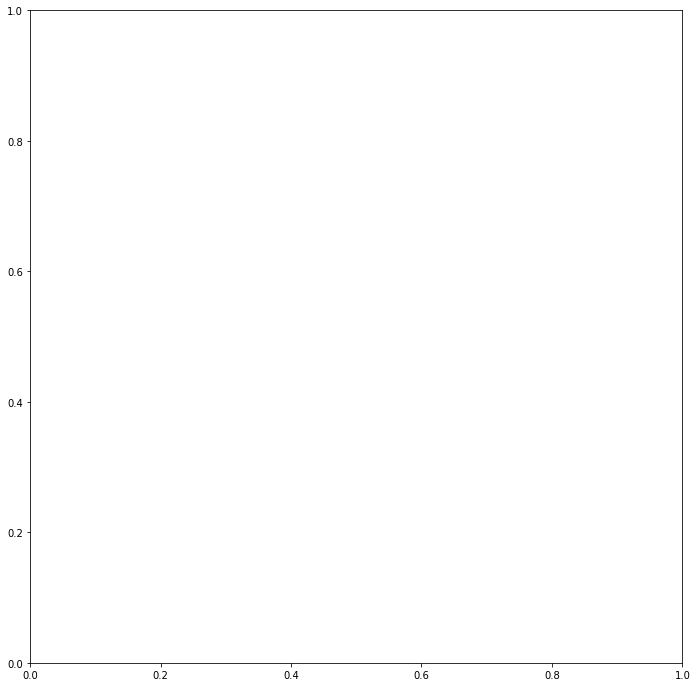

In [114]:
self.ax = gpd.GeoDataFrame(geometry=[]).plot(figsize=(18, 12))
plt.show()

In [116]:
folium.Choropleth(gpd_df,
    name='geojson').add_to(m)

ValueError: Cannot render objects with any missing geometries:                                                     0
0   POLYGON ((-22.90010550907429 -43.5809996356980...
1   POLYGON ((-22.966207911454692 -43.613336235540...
2   POLYGON ((-22.90010550907429 -43.5809996356980...
3   POLYGON ((-22.94015234484009 -43.4900483695839...
4   POLYGON ((-23.84505191047567 -43.3686335222657...
5   POLYGON ((-23.104110697121143 -43.382749141824...
6   POLYGON ((-22.962934885338086 -43.297387771938...
7   POLYGON ((-22.94184896123436 -43.4416037631505...
8   POLYGON ((-22.885643024803493 -43.408225622380...
9   POLYGON ((-22.939394662935555 -43.445831236942...
10  POLYGON ((-23.104110697121143 -43.382749141824...
11  POLYGON ((-22.97182321601523 -43.3295979397065...
12  POLYGON ((-23.016044299361592 -43.392823462738...
13  POLYGON ((-23.104110697121143 -43.382749141824...
14  POLYGON ((-23.104110697121143 -43.382749141824...

In [21]:
from geovoronoi import voronoi_regions_from_coords, points_to_coords

In [23]:
from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area

In [24]:
from shapely.ops import cascaded_union

## new tests

In [118]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [138]:
gpd_df[[0]].head(1)

,0
0,POLYGON ((-22.90010550907429 -43.5809996356980...


In [142]:
vor.regions

[[3, -1, 2],
 [2, 0, -1],
 [3, 1, -1],
 [6, 1, 3, 2, 0, 5],
 [8, 5, 6, 4, 7],
 [-1, 0, 5, 8],
 [],
 [10, -1, 9],
 [15, 11, 12, 13, 14],
 [13, -1, 9, 12],
 [14, 4, 6, 1, -1, 13],
 [19, 17, 16, 18],
 [17, 10, 9, 12, 11, 16],
 [18, 15, 11, 16],
 [19, 7, 8, -1, 10, 17],
 [19, 7, 4, 14, 15, 18]]